In [ ]:
import os
import math
import pandas as pd

%matplotlib inline
fig_size = [5,5]
plt.rcParams["figure.figsize"] = fig_size


bem1_names = ['WYK8308_Control_Pol','WYK8308_001Pulse_Pol','WYK8308_1Pulse_Pol', 'WYK8308_2Pulse_Pol', 'WYK8308_3Pulse_Pol', 'WYK8308_30Sec_Pol','WYK8308_15Sec_Pol', 'WYK8308_10Sec_Pol']


names_for_expt = ['DS377_Expt', 'DS381_PolarizationEff', 'DS382_PolarizationEff', 'WYK8308_Pol_Expt']
names_for_control = ['DS377_Control', 'DS381_Control', 'DS382_Control', 'WYK8308_Pol_Control']


directory = '/Users/Kristen/Desktop/DATA/FINISHED/Cdc24_Variants_Polarization/Control'
all_directories = [name for name in os.listdir(directory)]
all_directories = all_directories[1:]

extracted_pol = {}
extracted_sem = {}
extracted_ave = {}
for name in all_directories: 
    curr_dir = os.path.join(directory, name)
    for f in os.listdir(curr_dir):
        if f == "new_bud_vs_target.csv" or f == "Polarization_Efficiency.csv":
            current_file = os.path.join(curr_dir, f)
            data = pd.read_csv(current_file)
            rads = np.asarray(data['Radians'])
            pol_eff = []
            for r in rads:
                pol = 1-2*(np.mean(r)/np.pi)
                pol_eff.append(pol)
            std = np.std(np.asarray(pol_eff))
            num_cells = float(len(pol_eff))
            sem = std/(math.sqrt(num_cells))
            
            extracted_pol[name] = pol_eff
            extracted_sem[name] = sem
            extracted_ave[name] = np.mean(pol_eff)

fig = plt.figure()
ax = fig.gca()
data_pol = []
data_ave = []
data_sem = []
for curr_data in bem1_names:
    pol = extracted_pol[curr_data]
    data_pol.append(pol)
    
    ave = extracted_ave[curr_data]
    data_ave.append(ave)
    
    sem = extracted_sem[curr_data]
    data_sem.append(sem)
    
whiskerprops = dict(linestyle='')
medianprops = dict(linestyle='')
meanlineprops = dict(linestyle='-', color='black')

bp = plt.boxplot(data_pol, showbox=False, showcaps=False, meanprops=meanlineprops, meanline=True, showmeans=True, medianprops=medianprops, showfliers=False, whiskerprops=whiskerprops)
for i, n in enumerate([1,2,3,4,5,6,7,8]):
    #print n
    y = data_pol[i]
    x = np.random.normal(n, 0.04, size=len(y))
    plt.plot(x, y, color='gray', marker='.', linestyle='')

#x = np.random.normal([1,2,3,4,5,6,7,8], 0.04, size=len(pol_eff))
#plt.plot(x, pol_eff, 'r.')
plt.ylim(-1,1)
ax.set_xticks(np.arange(1.5,8.5,1))
ax.set_yticks(np.arange(-1.0,1,0.25))
plt.rc('grid', linestyle=":", color='black')
ax.yaxis.grid()


plt.errorbar([1,2,3,4,5,6,7,8], data_ave, yerr=data_sem, fmt=None, ecolor='k')

save_to = '/Users/Kristen/Desktop/12132016/PULSED_POLARIZATION/WYK8308_Pulsed_Polarization/Bem1_PolEff_Scatter.pdf'
#plt.savefig(save_to)

plt.show()

In [4]:
import os

directory = "/Users/Kristen/Desktop/cla4_variants/Bem1"
directories = os.listdir(directory)
#print directories[1:]

cla4 = "/Users/Kristen/Desktop/cla4_variants/Cla4_alone"
cla4_dirs = os.listdir(cla4)
print cla4_dirs[1:]

['F15A_3pulse', 'F15A_F451A_3pulse', 'F451A_3pulse', 'F451A_3pulse_2', 'F451A_K594A_3pulse', 'K594A_3pulse', 'wt_3pulse', 'wt_control']


1
3
4
5
6
7
2


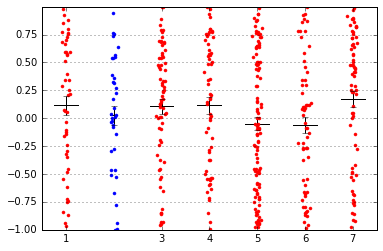

In [48]:
%matplotlib inline
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

co_recruit_bem1 = ['wt_bem1_1pulse','K594A_Bem1_1pulse', 'F15A_Bem1_1pulse', 
                   'F451A_Bem1_1pulse', 'F15A_F451A_Bem1_1pulse','F451A_K594A_Bem1_1pulse']

cla4_alone = ['wt_3pulse', 'K594A_3pulse', 'F15A_3pulse', 
              'F451A_3pulse', 'F15A_F451A_3pulse', 'F451A_K594A_3pulse']

cla4_control = ['wt_control']

cla4 = "/Users/Kristen/Desktop/cla4_variants/Cla4_alone"
all_directories = os.listdir(cla4)
all_directories = all_directories[1:]

def extract_polarization_data(file_names, root_directory):
    extracted_pol = {}
    extracted_sem = {}
    extracted_ave = {}
    for name in file_names: 
        curr_dir = os.path.join(root_directory, name)
        for f in os.listdir(curr_dir):
            if f.endswith(".csv"):
                current_file = os.path.join(curr_dir, f)
                data = pd.read_csv(current_file)
                data = data[data["pol eff"] != "#VALUE!"]
                data["pol eff"] = data["pol eff"].astype(float)
                pol_eff = np.asarray(data['pol eff'])
                #print pol_eff

                std = np.std(np.asarray(pol_eff))
                num_cells = float(len(pol_eff))
                sem = std/(math.sqrt(num_cells))
            
                extracted_pol[name] = pol_eff
                extracted_sem[name] = sem
                extracted_ave[name] = np.mean(pol_eff)
            
    return extracted_pol, extracted_sem, extracted_ave 

def collect_data(polarization, average, std_error, file_names):
    data_pol = []
    data_ave = []
    data_sem = []
    for curr_data in file_names:
        pol = polarization[curr_data]
        data_pol.append(pol)
    
        ave = average[curr_data]
        data_ave.append(ave)
    
        sem = std_error[curr_data]
        data_sem.append(sem)
        
    return data_pol, data_ave, data_sem

pol, sem, ave = extract_polarization_data(cla4_alone, cla4)
control_pol, control_sem, control_ave = extract_polarization_data(cla4_control, cla4)

data_pol, data_ave, data_sem = collect_data(pol, ave, sem, cla4_alone)
con_pol, con_ave, con_sem = collect_data(control_pol, control_ave, control_sem, cla4_control)

expt_positions = [1,3,4,5,6,7]
control_positions = [2]

fig = plt.figure()
ax = fig.gca()
whiskerprops = dict(linestyle='')
medianprops = dict(linestyle='')
meanlineprops = dict(linestyle='-', color='black')

control_bp = plt.boxplot(con_pol, positions=control_positions, showbox=False, showcaps=False, meanprops=meanlineprops, meanline=True, showmeans=True, medianprops=medianprops, showfliers=False, whiskerprops=whiskerprops)
expt_bp = plt.boxplot(data_pol, positions=expt_positions, showbox=False, showcaps=False, meanprops=meanlineprops, meanline=True, showmeans=True, medianprops=medianprops, showfliers=False, whiskerprops=whiskerprops)

for i, n in enumerate(expt_positions):
    print n
    y = data_pol[i]
    x = np.random.normal(n, 0.04, size=len(y))
    plt.plot(x, y, color='red', marker='.', linestyle='')   

for i, n in enumerate(control_positions):
    print n
    y = con_pol[i]
    x = np.random.normal(n, 0.04, size=len(y))
    plt.plot(x, y, color='blue', marker='.', linestyle='')
    
plt.errorbar(expt_positions, data_ave, yerr=data_sem, fmt=None, ecolor='k')
plt.errorbar(control_positions, con_ave, yerr=con_sem, fmt=None, ecolor='k')

plt.ylim(-1,1)
ax.set_yticks(np.arange(-1.0,1,0.25))
plt.rc('grid', linestyle=":", color='black')
ax.yaxis.grid()

save_to = "/Users/Kristen/Desktop/cla4_variants/Cla4_alone/Cla4_Alone_Polarization_Efficiency.pdf"
plt.savefig(save_to)

plt.show()

{'F451A_K594A_Bem1_1pulse': 0.4342043680980392, 'wt_bem1_1pulse': 0.31609305629090906, 'F15A_F451A_Bem1_1pulse': 0.29391631256790124, 'F451A_Bem1_1pulse': 0.67375613375471699, 'K594A_Bem1_1pulse': 0.19912132168571431, 'F15A_Bem1_1pulse': 0.22979843029508196}
1
2
3
4
5
6


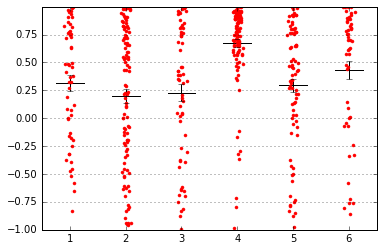

In [54]:
co_recruit_bem1 = ['wt_bem1_1pulse','K594A_Bem1_1pulse', 'F15A_Bem1_1pulse', 
                   'F451A_Bem1_1pulse', 'F15A_F451A_Bem1_1pulse','F451A_K594A_Bem1_1pulse']

with_bem1 = "/Users/Kristen/Desktop/cla4_variants/Bem1"

pol, sem, ave = extract_polarization_data(co_recruit_bem1, with_bem1)
print ave
data_pol, data_ave, data_sem = collect_data(pol, ave, sem, co_recruit_bem1)

expt_positions = [1,2,3,4,5,6]

fig = plt.figure()
ax = fig.gca()
whiskerprops = dict(linestyle='')
medianprops = dict(linestyle='')
meanlineprops = dict(linestyle='-', color='black')

expt_bp = plt.boxplot(data_pol, positions=expt_positions, showbox=False, showcaps=False, meanprops=meanlineprops, meanline=True, showmeans=True, medianprops=medianprops, showfliers=False, whiskerprops=whiskerprops)

for i, n in enumerate(expt_positions):
    print n
    y = data_pol[i]
    x = np.random.normal(n, 0.04, size=len(y))
    plt.plot(x, y, color='red', marker='.', linestyle='')
    
plt.errorbar(expt_positions, data_ave, yerr=data_sem, fmt=None, ecolor='k')

plt.ylim(-1,1)
ax.set_yticks(np.arange(-1.0,1,0.25))
plt.rc('grid', linestyle=":", color='black')
ax.yaxis.grid()

save_to = "/Users/Kristen/Desktop/cla4_variants/Bem1/Cla4_Bem1_Polarization_Efficiency.pdf"
plt.savefig(save_to)

plt.show()